In [8]:
import pandas as pd
import numpy as np


df_soil=pd.read_csv("LUCAS_2018_Copernicus/LUCAS-SOIL-2018.csv")

df_crop=df_soil[df_soil["LC"]=="B11"]


indices = df_crop.index[df_crop['POINTID'] == 52043276]
print(indices)

Index([16265], dtype='int64')


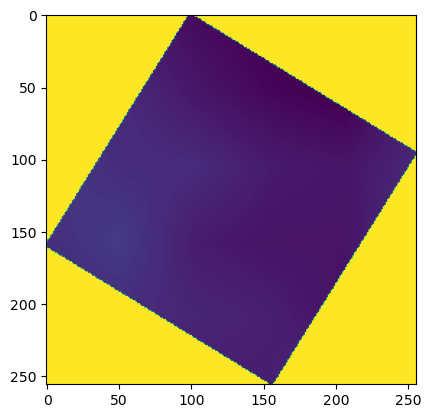

In [5]:
# packages read all below
import geopandas as gpd
import pandas as pd
import numpy as np
from sentinelhub import SHConfig
from sentinelhub.geometry import Geometry
from shapely.geometry import Polygon, mapping, MultiPolygon
import shutil
import os
import tifffile as tiff
import json
import glob
from sentinelhub import CRS, DataCollection, MimeType
import datetime
import math
import matplotlib.pyplot as plt
from sentinelhub import (
    CRS,
    DataCollection,
    MimeType,
    MosaickingOrder,
    SentinelHubDownloadClient,
    SentinelHubRequest,


)

df_soil=pd.read_csv("LUCAS_2018_Copernicus/LUCAS-SOIL-2018.csv")

idx=np.where(df_soil["LC0_Desc"]=="Cropland")[0]

# get the point ids
crop_ids=np.array(df_soil.iloc[idx]["POINTID"])



imgs=glob.glob("MSAVI2_data/*/sr.tiff",recursive=True)
#%% Extract ID numbers and dates of images
id_numbers = []
date_l=[]

for img_path in imgs:
    # Extract the folder name from the path
    folder_name = os.path.basename(os.path.dirname(img_path))
    
    # Split the folder name by underscore
    parts = folder_name.split('_')
    
    # The ID number is the first part before the underscore
    id_number = parts[0]
    date=parts[1]
    
    # Append the ID number to the list
    id_numbers.append(int(id_number))
    date_l.append(date)

id_numbers=np.array(id_numbers)

#%% match idx and id numbers of the crops
idx=np.where(np.isin(id_numbers,crop_ids))[0]
date_crops_l=np.array(date_l)[idx] # date list
id_crops_l=np.array(id_numbers)[idx] # id number list
img_crops_l1=np.array(imgs)[idx] # list of images based on id number

#%% plot your results to see what you have downloaded 
import tifffile as tiff

test=tiff.imread(imgs[0])

# plot what you have found
plt.imshow(test)

test=tiff.imread(img_crops_l1[0])
 
#test = np.where(test > 0.0, test, np.nan)